### 결정 트리 분류

- 스무고개처럼 질문/결정을 통해 데이터를 분류하는 모델
    - 데이터 스케일링 영향이 적음
    - 선형 구조가 아닌 복잡한 구조의 데이터에 적합
    - 과대적합 되기 쉬움 -> 가지치기 등을 통해 과대적합 방지

**하이퍼 파라미터**

<table>
  <thead>
    <tr>
      <th>파라미터 명</th>
      <th>설명</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td><code>max_depth</code></td>
      <td>
        트리의 최대 깊이를 규정 (디폴트: None) <br>
        None으로 설정하면 완벽하게 클래스 결정 값이 될 때까지 깊이를 계속 키우며 분할하거나 노드가 가지는 데이터 개수가 <code>min_samples_split</code>보다 작아질 때까지 계속 깊이를 증가시킴 <br>
        깊이가 길어지면 <code>min_samples_split</code> 설정대로 최대 분할하여 과적합할 수 있으므로 적절한 값으로 제어 필요
      </td>
    </tr>
    <tr>
      <td><code>max_features</code></td>
      <td>
        최적의 분할을 위해 고려할 최대의 피처 개수 (디폴트: None / 데이터셋의 모든 피처를 사용해 분할 수행)
        <ul>
          <li><code>int</code> 형으로 지정하면 대상 피처의 개수, <code>float</code> 형으로 지정하면 전체 피처 중 대상 피처의 퍼센트</li>
          <li><code>'sqrt'</code>는 전체 피처 중 sqrt(전체 피처 개수) 즉, 전체 피처 개수의 제곱근만큼 선택</li>
          <li><code>'auto'</code>로 지정하면 sqrt와 동일</li>
          <li><code>'log'</code>는 전체 피처 중 log2(전체 피처 개수) 선택</li>
          <li><code>'None'</code>은 전체 피처 선택</li>
        </ul>
      </td>
    </tr>
    <tr>
      <td><code>min_samples_split</code></td>
      <td>
        노드 분할을 위한 최소 samples (디폴트 : <code>min_samples_split=2</code> == 부모노드의 sample수가 2 이상인 경우 분할, 자식노드의 sample수가 2이하일 수 있음) <br>
        작게 설정할 수록 과적합 가능성 증가(세세하게 기준이 적용되므로)
      </td>
    </tr>
    <tr>
      <td><code>min_samples_leaf</code></td>
      <td>
        분할 이후 만족시켜야 할 sample 최소 개수 (<code>min_samples_leaf=2</code>일 때, 분할 이후 자식노드의 sample수가 2개 이상이 된다면 부모노드를 분할) <br>
        작게 설정할수록 과적합 가능성 증가
      </td>
    </tr>
    <tr>
      <td><code>max_leaf_nodes</code></td>
      <td>분할 이후 leaf_node 최대개수</td>
    </tr>
    <tr>
      <td><code>criterion</code></td>
      <td>
        분할을 위해 사용할 성능 평가 지표 설정 <br>
        <code>gini</code> 또는 <code>entropy</code> 값을 사용할 수 있으며, <code>gini</code>는 지니 계수를, <code>entropy</code>는 정보 이득을 기반으로 분할 기준을 결정
      </td>
    </tr>
    <tr>
      <td><code>min_weight_fraction_leaf</code></td>
      <td>
        리프 노드가 전체 가중치에서 차지해야 하는 최소 비율 (디폴트: 0) <br>
        특정 클래스의 데이터가 지나치게 적은 경우 과적합을 방지하기 위해 사용
      </td>
    </tr>
  </tbody>
</table>

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### 이진 분류
와인 품질 데이서셋을 가공한/ 레드, 화이트 와인 이진분류 데이터셋
0: 레드 와인, 1: 화이트 와인

In [2]:
# 데이터 로드
wine_df = pd.read_csv('./data/wine_simple.csv')

wine_df.info(), wine_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


(None,
            alcohol        sugar           pH        class
 count  6497.000000  6497.000000  6497.000000  6497.000000
 mean     10.491801     5.443235     3.218501     0.753886
 std       1.192712     4.757804     0.160787     0.430779
 min       8.000000     0.600000     2.720000     0.000000
 25%       9.500000     1.800000     3.110000     1.000000
 50%      10.300000     3.000000     3.210000     1.000000
 75%      11.300000     8.100000     3.320000     1.000000
 max      14.900000    65.800000     4.010000     1.000000)

In [3]:
# 데이터 분리 및 스케일링
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = wine_df.drop('class', axis=1)
y = wine_df['class']

# train - test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 스케일링 (값 간 오차를 줄이는 작업)
std_sc = StandardScaler()
X_train_scaled = std_sc.fit_transform(X_train)
X_test_scaled = std_sc.transform(X_test)

print(X_train_scaled.shape, X_test_scaled.shape)

# scaled를 하든 안 하든 거의 비슷한 성능 보임

(4872, 3) (1625, 3)


In [4]:
# 모델 학습 및 평가
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=0, max_depth=3)
#   random_state= 고정하는 이유: 질문의 형태가 달라져서(가하는 규칙이 달라져서) test 데이터 평가 점수도 달라짐
dt_clf.fit(X_train_scaled, y_train)

print(dt_clf.score(X_train_scaled, y_train), dt_clf.score(X_test_scaled, y_test))
# 규제 매개변수 설정x : 0.9975369458128078 0.8763076923076923
#                  : max_depth 설정 안 하면 이 df에 대해선 26번 실행
# max_depth=3 : 0.8433908045977011 0.8584615384615385
#             : 최대깊이 지정. 과적합 해결. 단, 성능은 감소
# max_depth=6 : 0.8721264367816092 0.8769230769230769

0.8433908045977011 0.8584615384615385


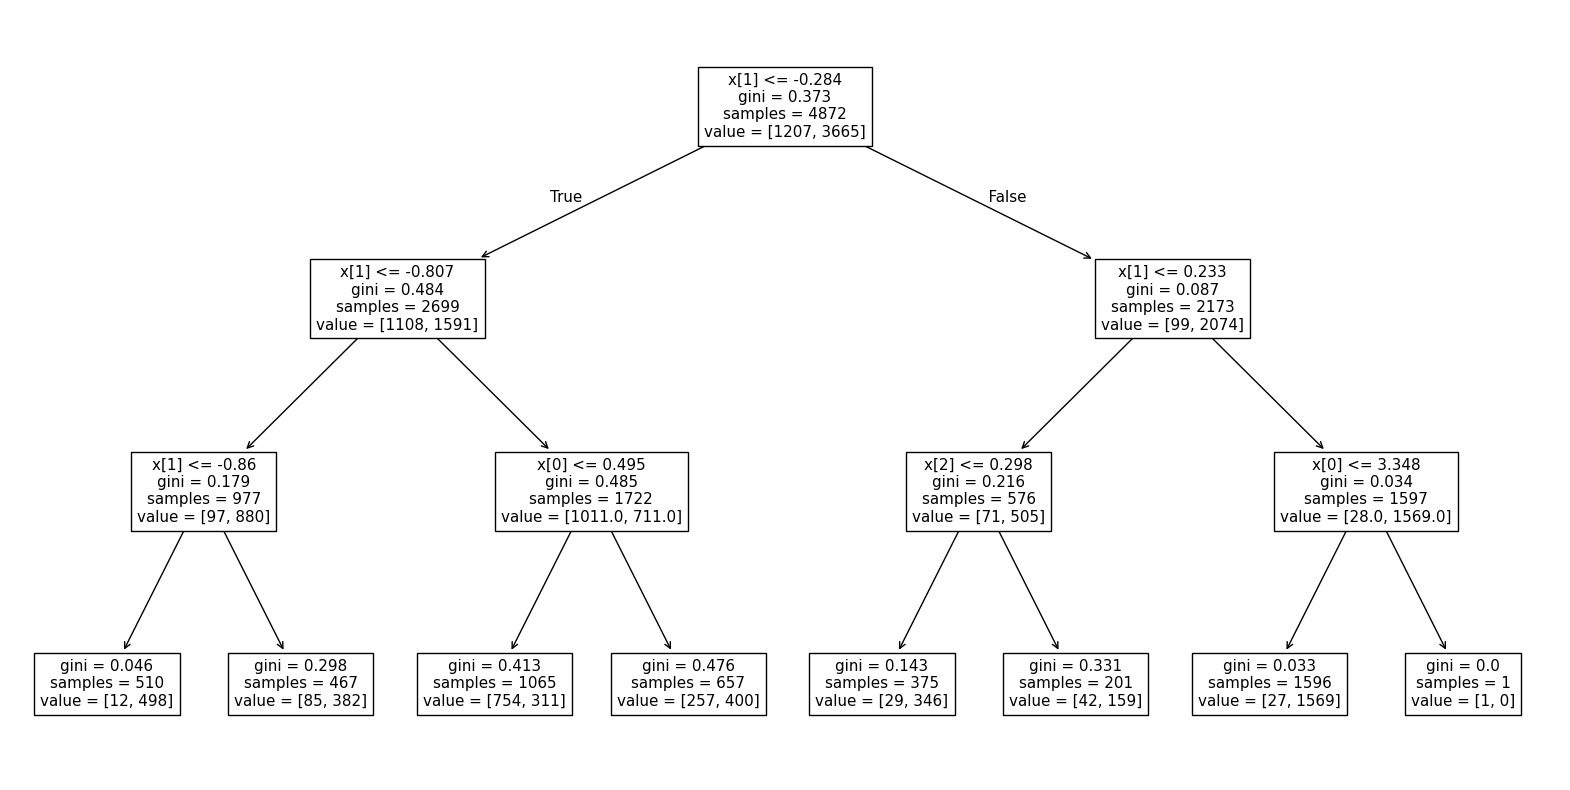

In [5]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(dt_clf)
# 결정 트리 (분류) 시각화

plt.savefig('wine_simple.png')
# 동위 폴더에 .png 파일 저장됨
plt.show()

#루트 노드 value=[1207, 3665] = 각각 y_train의 0, 1 값 개수
# 리프 노드의 value에 대해 더 큰 값의 인덱스를, 그 리프 노드에 있는 sample들의 분류값으로 책정

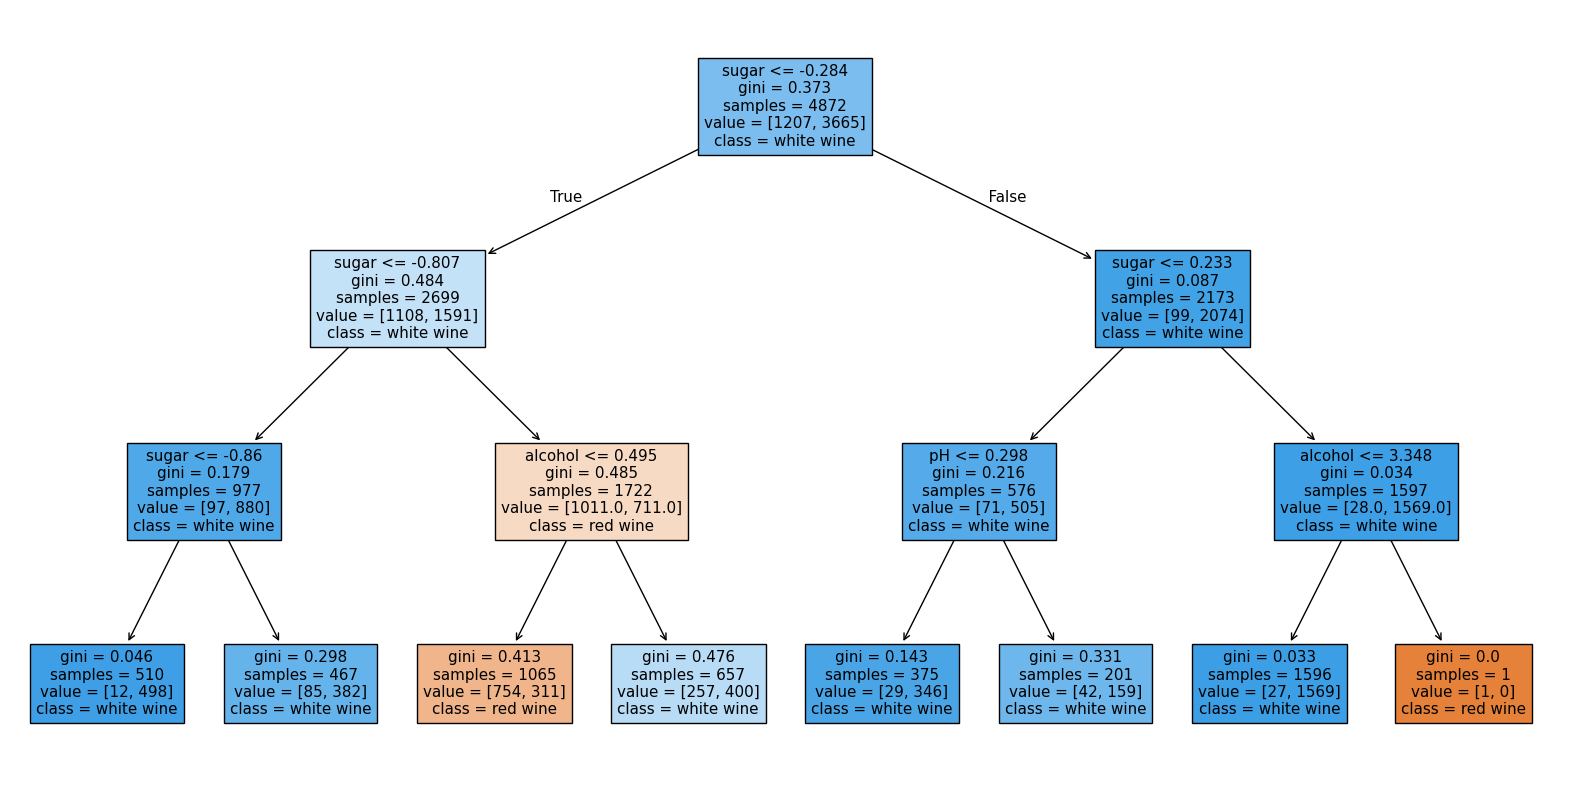

'\nsugar <= -0.284         # DecisionTreeClassifier가 정한 분할 기준 \ngini = 0.373            # 지니계수 (지니 불순도)\nsamples = 4872          # 현재 노드의 전체 샘플수\nvalue = [1207, 3665]    # 클래스별 샘플 개수 (0번 클래스 1207개, 1번 클래스 3665개)\nclass = white wine      # 현재 노드의 클래스 (= value에가 클래스)\n'

In [6]:
plt.figure(figsize=(20, 10))

plot_tree(
    dt_clf,
    filled=True,    # 색 채우기 옵션 (특정 클래스의 비율 표현)
                    # 지니 불순도가 낮을수록 색깔이 진해짐. 섞인 게 적으므로 진함...
    feature_names=X.columns, # 특성 이름을 지정. x[0]으로 나오던 게 칼럼이름으로 나옴
    class_names=['red wine', 'white wine'], # 어떤 class인지 같이 출력.
    max_depth=3
    )

plt.savefig('wine_simple2.png')
# 동위 폴더에 .png 파일 저장됨
plt.show()

"""
sugar <= -0.284         # DecisionTreeClassifier가 정한 분할 기준 
gini = 0.373            # 지니계수 (지니 불순도)
samples = 4872          # 현재 노드의 전체 샘플수
value = [1207, 3665]    # 클래스별 샘플 개수 (0번 클래스 1207개, 1번 클래스 3665개)
class = white wine      # 현재 노드의 클래스 (= value에가 클래스)
"""

In [7]:
# 지니 불순도 직접 계산
# 제일 왼쪽 리프 노드
print(1 - ((12/510)**2 + (498/510)**2))

0.04595155709342569


In [8]:
# 특성 중요도
# [alcohol, sugar, pH]
dt_clf.feature_importances_
# sugar -> alcohol, pH 순으로 높은 중요도 값을 가짐
# scaled를 안 해도 비슷한 중요도 값을 가짐 -> 결정 트리는 특성 scale의 영향을 거의 받지 않음

# 지니 불순도 감소에 기여한 만큼 중요도가 높아짐

array([0.11483515, 0.87892904, 0.00623581])

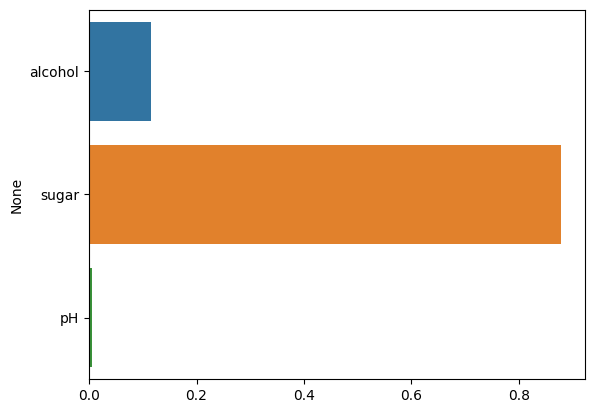

In [9]:
# 특성 중요도 시각화
sns.barplot(x=dt_clf.feature_importances_, y=X.columns, hue=X.columns)
plt.show()

(실습-완료)
##### iris 다중분류

In [34]:
iris_data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

1.0 0.9736842105263158


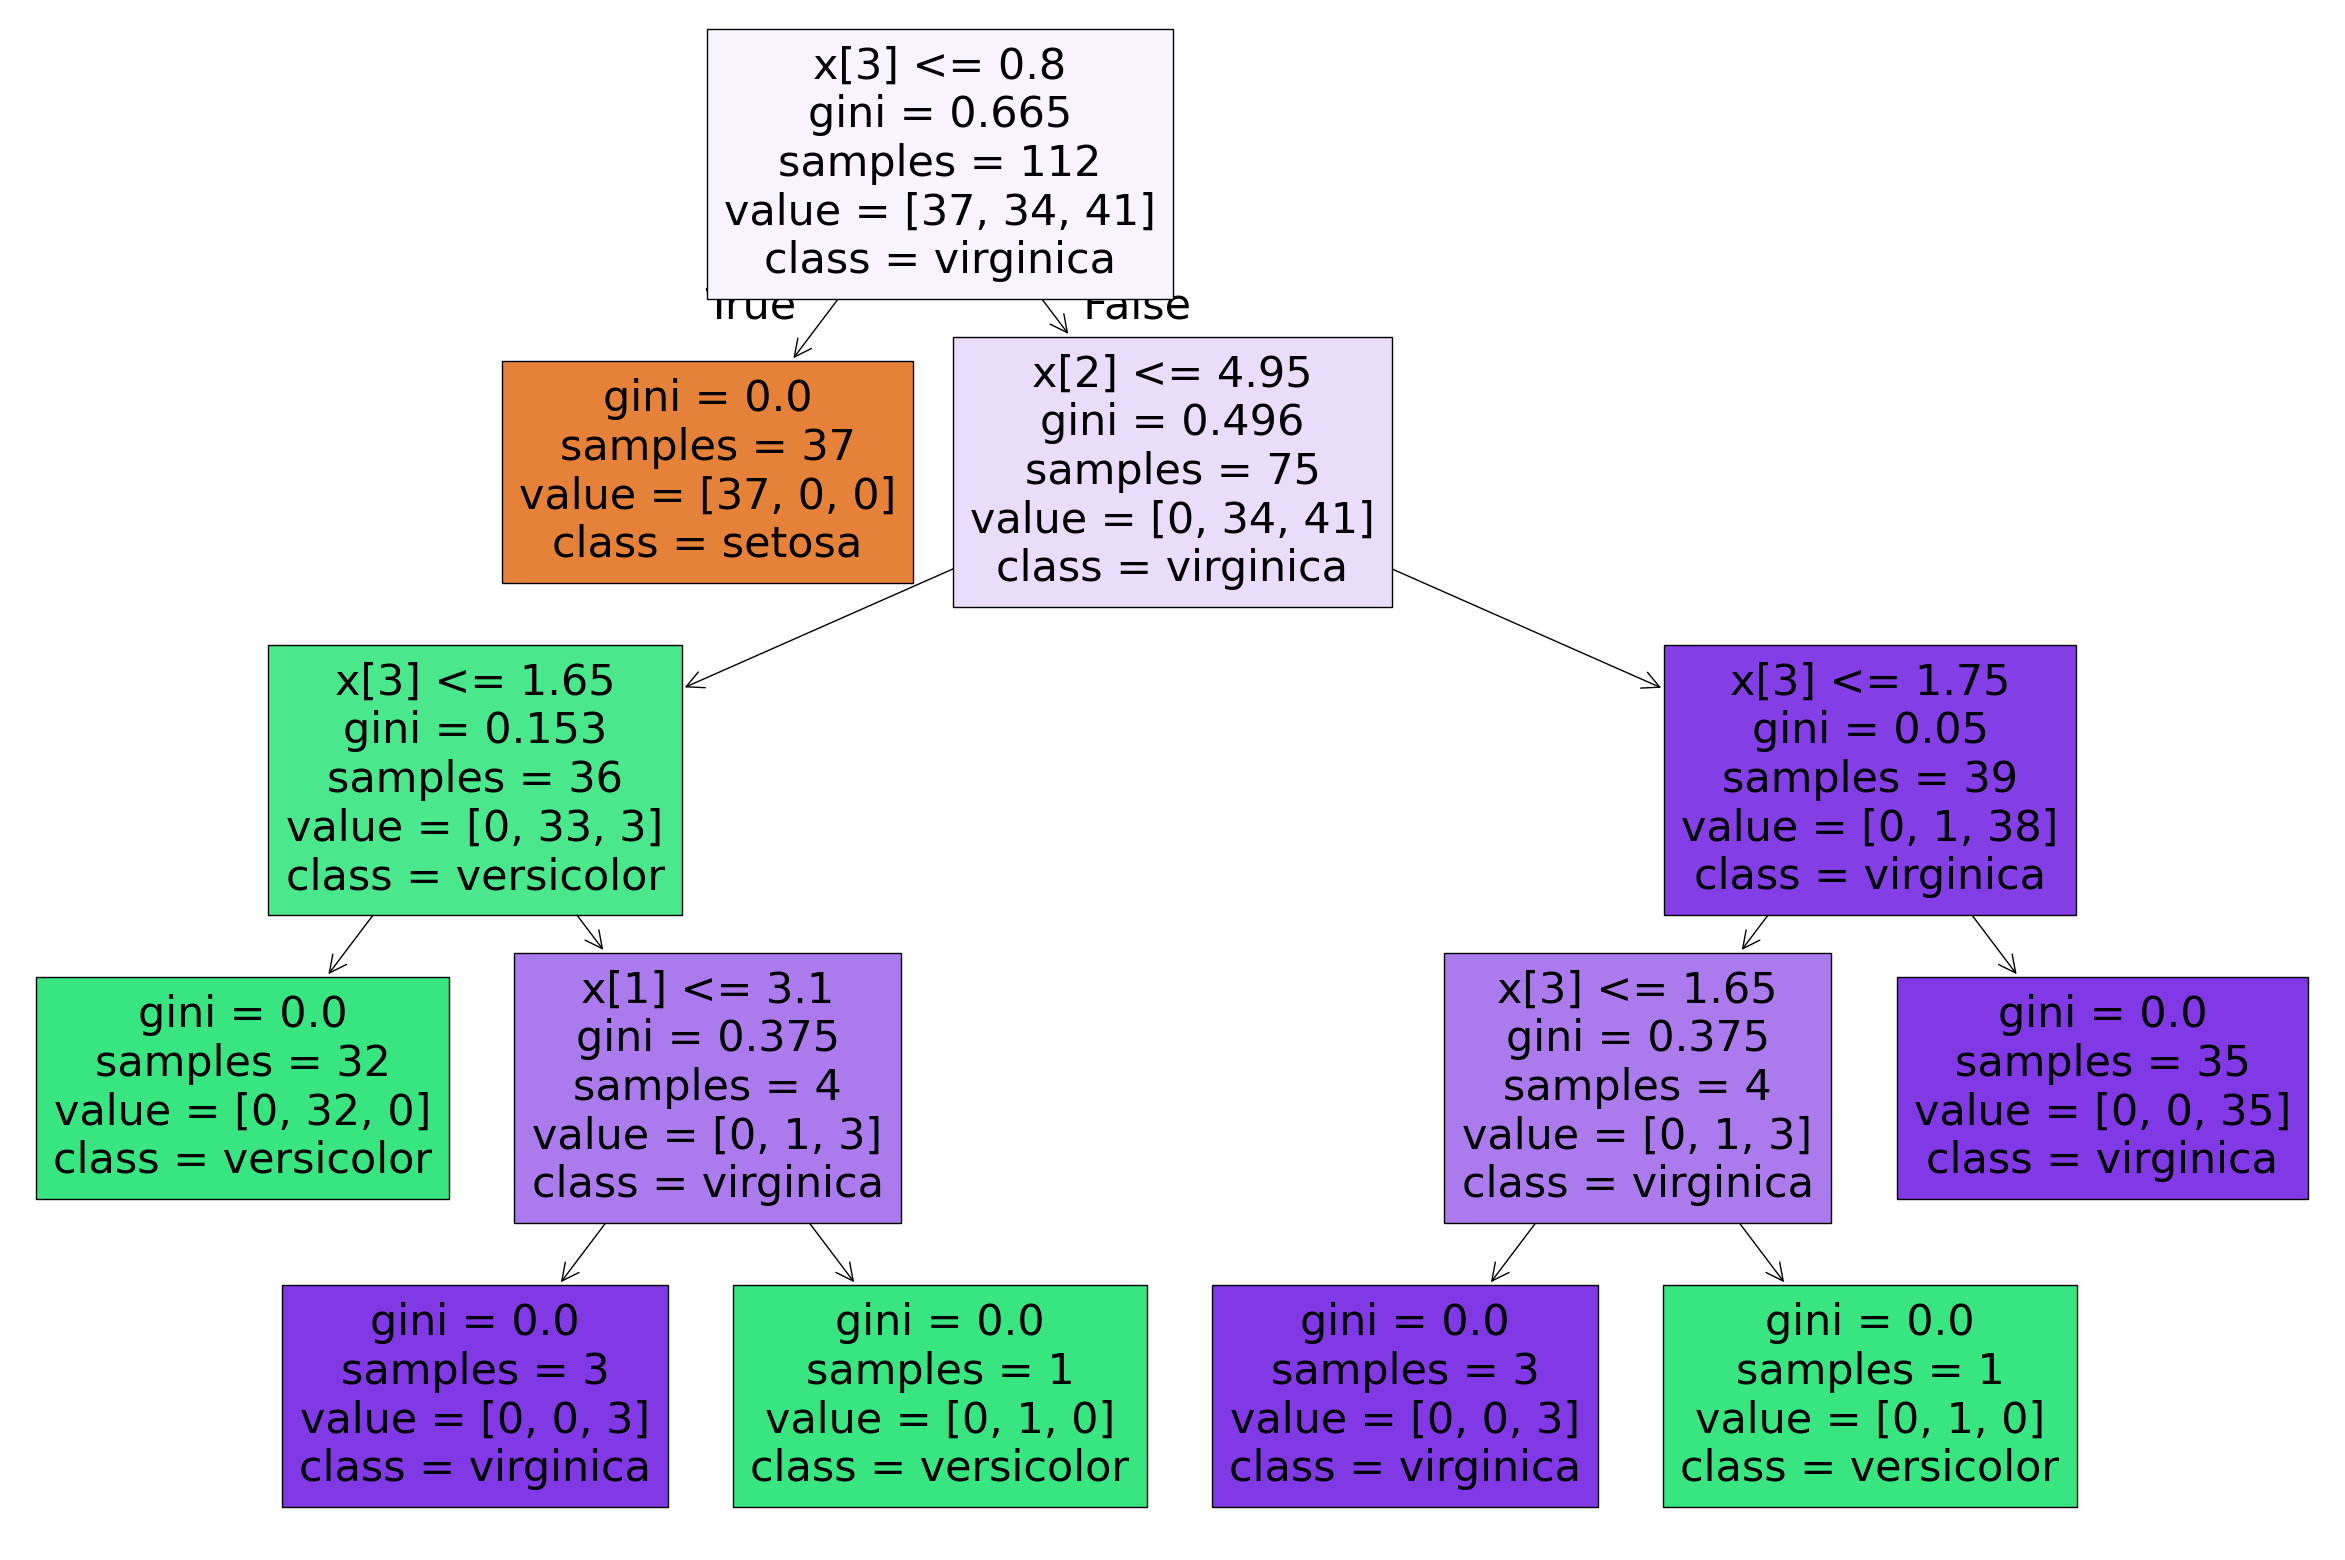

In [36]:
# 데이터 로드 및 분리
from sklearn.datasets import load_iris

iris_data = load_iris()

X = iris_data.data
y = iris_data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 결정 트리 모델 학습 및 평가
Dtree_clf = DecisionTreeClassifier()#max_depth=3)

Dtree_clf.fit(X_train, y_train)
print(Dtree_clf.score(X_train, y_train), Dtree_clf.score(X_test, y_test))


# 트리모델 시각화
plt.figure(figsize=(30, 20))

plot_tree(
    Dtree_clf,
    filled=True,    # 색 채우기 옵션 (특정 클래스의 비율 표현)
    class_names=iris_data.target_names
    )

# plt.savefig('wine_simple2.png')
# 동위 폴더에 .png 파일 저장됨
plt.show()


In [37]:
Dtree_clf.feature_importances_

array([0.        , 0.02014872, 0.39927524, 0.58057605])

In [38]:
iris_data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

도출한 인사이트: (작성)
*인사이트: 데이터 보고 나올 수 있는 해석
1. setosa는 명확한 특징 때문에 1차 분할에서 모든 row가 분할됨.
2. max_depth를 설정하지 않아도 깊이 4층만에 모두 지니 불순도 0으로 명확히 분할됨.
3. 특성 중요도 출력 결과 sepal 정보보단 petal 정보로 데이터 분류. 특히 petal width

##### 결정 트리 (회귀)
- 각 노드에서 MSE를 최소화하는 방향으로 노드 분할
- 최종(리프) 노드에서는 각 샘플들의 평균값을 계산해 예측값으로 사용

In [11]:
# 데이터 로드
from sklearn.datasets import fetch_california_housing
housing_data = fetch_california_housing()
housing_df = pd.DataFrame(housing_data.data, columns=housing_data.feature_names)
housing_df[housing_data.target_names[0]] = housing_data.target
# info, describe를 보기 위해 DF형으로 변환

housing_df.info(), housing_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


(None,
              MedInc      HouseAge      AveRooms     AveBedrms    Population  \
 count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
 mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
 std        1.899822     12.585558      2.474173      0.473911   1132.462122   
 min        0.499900      1.000000      0.846154      0.333333      3.000000   
 25%        2.563400     18.000000      4.440716      1.006079    787.000000   
 50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
 75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
 max       15.000100     52.000000    141.909091     34.066667  35682.000000   
 
            AveOccup      Latitude     Longitude   MedHouseVal  
 count  20640.000000  20640.000000  20640.000000  20640.000000  
 mean       3.070655     35.631861   -119.569704      2.068558  
 std       10.386050      2.135952      2.003532      1.153956  
 min       

In [12]:
# 데이터 준비 및 분류
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(housing_data.data, housing_data.target, random_state=0)

In [13]:
# (회귀) 모델 훈련 및 평가
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
dt_reg = DecisionTreeRegressor(random_state=0, max_depth=10)

dt_reg.fit(X_train, y_train)

print(dt_reg.score(X_train, y_train), dt_reg.score(X_test, y_test))
# 규제 매개함수 x : 1.0 0.5837851046291411 (대박 과적합)
# max_depth=10 : 0.8369838179078153 0.67633653853424 (다소 과적합)

# 예측
pred_train = dt_reg.predict(X_train)
pred_test = dt_reg.predict(X_test)

# 평가(train, test 데이터를 넣어 각각 mse, r2 지표 출력)
mse_train = mean_squared_error(y_train, pred_train)
r2_train = r2_score(y_train, pred_train)

mse_test = mean_squared_error(y_test, pred_test)
r2_test = r2_score(y_test, pred_test)

print(f'훈련 데이터에 대한 평가: mse {mse_train}, r2 {r2_train}\n-----------------')
# mse 8.051681073961231e-32, r2 1.0
# mse가 겁나 작은 값
print(f'검사 데이터에 대한 평가: mse {mse_test}, r2 {r2_test}')
# mse 0.5501739317092635, r2 0.5837851046291411

0.8369838179078153 0.67633653853424
훈련 데이터에 대한 평가: mse 0.21756926763976736, r2 0.8369838179078153
-----------------
검사 데이터에 대한 평가: mse 0.4278347582601065, r2 0.67633653853424


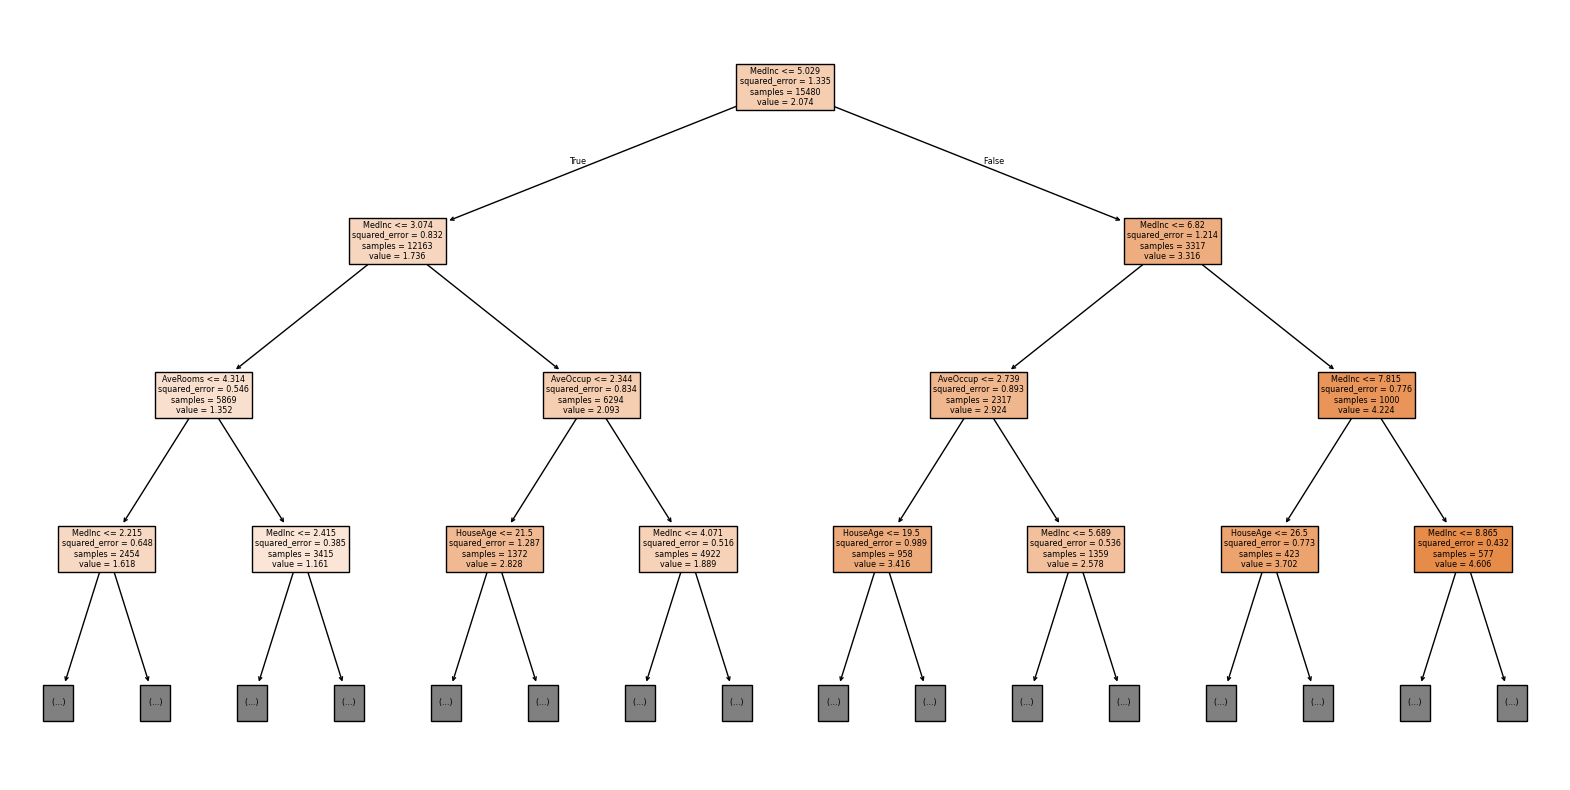

In [14]:
# 트리 시각화
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(
    dt_reg,
    filled=True,
    feature_names=housing_data.feature_names,
    max_depth=3
)
plt.savefig('housing_reg.png')
plt.show()
# 분류에선 values가 class별 sample 개수.
# 회귀에서 value는 해당 노드 target의 평균

In [15]:
# 특성 중요도
dt_reg.feature_importances_
# 피쳐가 8개이므로 8개의 값이 나옴
# MSE 최소화를 목적으로 하므로 MSE에 영향을 많이 받는 칼럼일수록 중요도가 높음
# max_depth를 올릴수록 트리 분류를 여러 번 하므로 다양한 중요도 값이 나옴.
#             내릴수록 분류 기준으로 선정조차 되지 않아 0인 칼럼 존재

array([0.61142957, 0.04479459, 0.03445471, 0.01282351, 0.01652131,
       0.13110284, 0.07239124, 0.07648224])

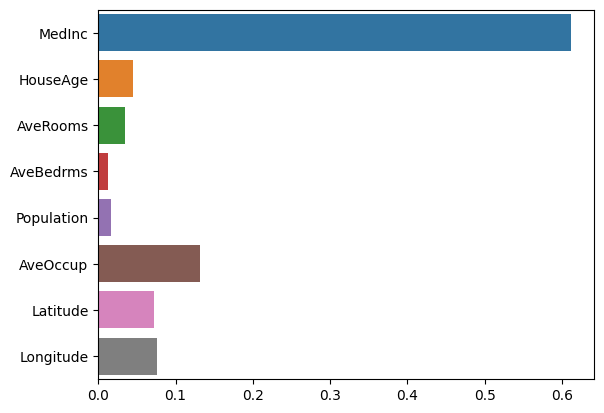

In [16]:
# 특성 중요도 시각화
sns.barplot(
    x=dt_reg.feature_importances_,
    y=housing_data.feature_names,
    hue=housing_data.feature_names
)
plt.show()
# MedInc가 제일 높은 중요도 보임